# Introduction to Pandas

In [2]:
import pandas as pd 
import numpy as np

## Series

A Series is a one-dimensional array-like object containing an array of data (of any NumPy data type) and an associated array of data labels, called its index. The simplest Series is formed from only an array of data:

In [3]:
mydata = ['Boat', 'Car', 'Bike', 'Plane']

series1 = pd.Series(mydata)

In [4]:
series1

0     Boat
1      Car
2     Bike
3    Plane
dtype: object

In [5]:
mydata = [1, 55, 100, 666, 420]
series2 = pd.Series(mydata)

In [6]:
series2

0      1
1     55
2    100
3    666
4    420
dtype: int64

Notice that the type is inferred from the data. The index is a list of integers, which is automatically created when we do not specify an index. The type is set to the type of the data, in this case, integers. 

Unintuitively, the type for an array of strings is object. This is because NumPy (which pandas is built on) does not have a string data type, so it has to use Python objects. 

As of the moment this notebook was written, pandas stable release is in the 1.5 series. In pandas 2.0, the backend will be changed to use Apache Arrow, which will allow for better speed and memory usage, as well as interoperability with other libraries. 

You will also notice that arrays of strings will be changed to the string data type.

## DataFrames

A DataFrame is a tabular data structure containing an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index. Underneath, the data is stored as one or more two-dimensional blocks rather than a list, dict, or some other collection of one-dimensional arrays. 

In [7]:
mydf = [('Boat', 1), ('Car', 800), ('Bike', 70), ('Plane', 10)]

In [10]:
df = pd.DataFrame(mydf)

In [11]:
df

,0,1
0,Boat,1
1,Car,800
2,Bike,70
3,Plane,10


Notice the dummy column names. We can label the columns as we wish.

In [13]:
df = pd.DataFrame(mydf, columns=['Thing', 'Count'])
df

,Thing,Count
0,Boat,1
1,Car,800
2,Bike,70
3,Plane,10


Each column individually can be accessed as a Series.

In [14]:
df['Thing']

0     Boat
1      Car
2     Bike
3    Plane
Name: Thing, dtype: object

In [15]:
df.dtypes

Thing    object
Count     int64
dtype: object

## Reading Data

We can read data from a variety of sources. For example, we can read a CSV file.

In [16]:
df = pd.read_csv('name_age_gender_occupation.csv')
df

,Name,Age,Gender,Occupation
0,John Smith,32,Male,Engineer
1,Mary Johnson,45,Female,Lawyer
2,David Lee,28,Male,Accountant
3,Sarah Jones,38,Female,Teacher
4,Kevin Chen,23,Male,Student
...,...,...,...,...
58,Courtney Rodriguez,43,Female,Technical Program Manager
59,Andrew Wilson,29,Male,Software Quality Assurance Engineer
60,Gabrielle Hernandez,35,Female,Customer Experience Manager
61,Richard Davis,49,Male,Network Administrator


## Inspect Data

In [18]:
df.head() # shows the first 5 rows of a dataframe

,Name,Age,Gender,Occupation
0,John Smith,32,Male,Engineer
1,Mary Johnson,45,Female,Lawyer
2,David Lee,28,Male,Accountant
3,Sarah Jones,38,Female,Teacher
4,Kevin Chen,23,Male,Student


In [19]:
df.tail() # shows the last 5 rows of a dataframe

,Name,Age,Gender,Occupation
58,Courtney Rodriguez,43,Female,Technical Program Manager
59,Andrew Wilson,29,Male,Software Quality Assurance Engineer
60,Gabrielle Hernandez,35,Female,Customer Experience Manager
61,Richard Davis,49,Male,Network Administrator
62,Jessica Wright,31,Female,Web Designer


You might wanna know which data types each Series is. You can do that with the dtypes attribute.

In [20]:
df.dtypes

Name           object
 Age            int64
 Gender        object
 Occupation    object
dtype: object

Another commonly used method is `describe()`. It gives you a summary of the data in terms of count, mean, standard deviation, minimum, maximum, and quartiles.

In [21]:
df.describe()

,Age
count,63.000000
mean,35.174603
std,7.187668
min,23.000000
25%,29.000000
50%,35.000000
75%,40.500000
max,50.000000


## Columns and Rows

In [22]:
df[' Gender'] # You can reference columns by names

0        Male
1      Female
2        Male
3      Female
4        Male
       ...   
58     Female
59       Male
60     Female
61       Male
62     Female
Name:  Gender, Length: 63, dtype: object

In [24]:
df.loc[10] # You can reference any row by index using loc

Name             Laura Martinez
 Age                         31
 Gender                  Female
 Occupation     Project Manager
Name: 10, dtype: object

In [27]:
df.set_index('Name') # You can index with the set_index method, but only if the column passed has unique elements

,Age,Gender,Occupation
Name,,,
John Smith,32,Male,Engineer
Mary Johnson,45,Female,Lawyer
David Lee,28,Male,Accountant
Sarah Jones,38,Female,Teacher
Kevin Chen,23,Male,Student
...,...,...,...
Courtney Rodriguez,43,Female,Technical Program Manager
Andrew Wilson,29,Male,Software Quality Assurance Engineer
Gabrielle Hernandez,35,Female,Customer Experience Manager


In [30]:
df.set_index('Name').loc['Andrew Wilson'] # By setting an index like this, we can locate an element explicitly

 Age                                             29
 Gender                                        Male
 Occupation     Software Quality Assurance Engineer
Name: Andrew Wilson, dtype: object

## Subsetting Data

We might have a DataFrame with a lot of columns, that is hard to read. We can filter the data we need with different methods.

In [36]:
df = pd.read_csv('IMDB Top 250 Movies.csv')
df

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,The Help,2011,8.1,Drama,PG-13,2h 26m,Change begins with a whisper.,25000000,216639112,"Viola Davis,Emma Stone,Octavia Spencer,Bryce D...",Tate Taylor,"Tate Taylor,Kathryn Stockett"
246,247,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama",G,2h 22m,There is man and beast at nature's mercy. Ther...,4000000,14480,"Maksim Munzuk,Yuriy Solomin,Mikhail Bychkov,Vl...",Akira Kurosawa,"Akira Kurosawa,Yuriy Nagibin,Vladimir Arsenev"
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy",G,1h 30m,Wish granted! (DVD re-release),Not Available,Not Available,"Scott Weinger,Robin Williams,Linda Larkin,Jona...","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott"
248,249,Gandhi,1982,8.0,"Biography,Drama,History",PG,3h 11m,His Triumph Changed The World Forever.,22000000,52767889,"Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",Richard Attenborough,John Briley


In [41]:
df = df[['rank', 'name', 'year', 'rating', 'genre']] # Explicitly subsetting columns

In [40]:
df

,rank,name,year,rating,genre
0,1,The Shawshank Redemption,1994,9.3,Drama
1,2,The Godfather,1972,9.2,"Crime,Drama"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama"
4,5,12 Angry Men,1957,9.0,"Crime,Drama"
...,...,...,...,...,...
245,246,The Help,2011,8.1,Drama
246,247,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama"
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy"
248,249,Gandhi,1982,8.0,"Biography,Drama,History"


In [44]:
df[df['year'] > 1980] # Filtering rows by indexing with an array of booleans given by a condition

,rank,name,year,rating,genre
0,1,The Shawshank Redemption,1994,9.3,Drama
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama"
5,6,Schindler's List,1993,9.0,"Biography,Drama,History"
6,7,The Lord of the Rings: The Return of the King,2003,9.0,"Action,Adventure,Drama"
7,8,Pulp Fiction,1994,8.9,"Crime,Drama"
...,...,...,...,...,...
244,245,The Iron Giant,1999,8.1,"Animation,Action,Adventure"
245,246,The Help,2011,8.1,Drama
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy"
248,249,Gandhi,1982,8.0,"Biography,Drama,History"


In [46]:
df.loc[df['year'] > 1980] # Alternatively, using loc like this is equivalent

,rank,name,year,rating,genre
0,1,The Shawshank Redemption,1994,9.3,Drama
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama"
5,6,Schindler's List,1993,9.0,"Biography,Drama,History"
6,7,The Lord of the Rings: The Return of the King,2003,9.0,"Action,Adventure,Drama"
7,8,Pulp Fiction,1994,8.9,"Crime,Drama"
...,...,...,...,...,...
244,245,The Iron Giant,1999,8.1,"Animation,Action,Adventure"
245,246,The Help,2011,8.1,Drama
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy"
248,249,Gandhi,1982,8.0,"Biography,Drama,History"


A very useful method is `query()`. It allows us to filter the data using a query string, which is very convenient.

In [47]:
df.query('rating > 8.0')

,rank,name,year,rating,genre
0,1,The Shawshank Redemption,1994,9.3,Drama
1,2,The Godfather,1972,9.2,"Crime,Drama"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama"
4,5,12 Angry Men,1957,9.0,"Crime,Drama"
...,...,...,...,...,...
241,242,It Happened One Night,1934,8.1,"Comedy,Romance"
242,243,Persona,1966,8.1,"Drama,Thriller"
244,245,The Iron Giant,1999,8.1,"Animation,Action,Adventure"
245,246,The Help,2011,8.1,Drama


We might want to know what values are missing in a dataframe.

In [50]:
people = pd.read_csv('data_NaN.csv')
people

,Name,Gender,Age,Income,Education,Job,Location,Marital Status,Children,Savings
0,John,Male,32,50000.0,Bachelor's degree,Software Developer,California,Married,2,25000.0
1,Samantha,Female,27,35000.0,Associate's degree,Marketing Coordinator,New York,Single,0,5000.0
2,Peter,Male,45,80000.0,Master's degree,Manager,Texas,Married,3,70000.0
3,Emily,Female,38,NaN,Bachelor's degree,Teacher,Florida,Married,2,NaN
4,Jacob,Male,29,45000.0,Associate's degree,Graphic Designer,Colorado,Single,0,10000.0
5,Ava,Female,26,32000.0,NaN,Administrative Assistant,Ohio,Single,1,5000.0
6,Mark,Male,41,70000.0,Master's degree,Financial Analyst,New Jersey,Married,2,55000.0
7,Olivia,Female,33,55000.0,Bachelor's degree,Journalist,Illinois,Single,0,NaN
8,Noah,Male,36,62000.0,Master's degree,Engineer,Georgia,Married,1,45000.0
9,Sophia,Female,31,48000.0,Associate's degree,Human Resources Coordinator,California,Single,0,8000.0


In [57]:
people[~people['Savings'].isna()]

,Name,Gender,Age,Income,Education,Job,Location,Marital Status,Children,Savings
0,John,Male,32,50000.0,Bachelor's degree,Software Developer,California,Married,2,25000.0
1,Samantha,Female,27,35000.0,Associate's degree,Marketing Coordinator,New York,Single,0,5000.0
2,Peter,Male,45,80000.0,Master's degree,Manager,Texas,Married,3,70000.0
4,Jacob,Male,29,45000.0,Associate's degree,Graphic Designer,Colorado,Single,0,10000.0
5,Ava,Female,26,32000.0,NaN,Administrative Assistant,Ohio,Single,1,5000.0
6,Mark,Male,41,70000.0,Master's degree,Financial Analyst,New Jersey,Married,2,55000.0
8,Noah,Male,36,62000.0,Master's degree,Engineer,Georgia,Married,1,45000.0
9,Sophia,Female,31,48000.0,Associate's degree,Human Resources Coordinator,California,Single,0,8000.0


# Casting dtypes

We can often cast a column to a different dtype. For example, we can cast the `date` column to a datetime object.

In [59]:
df.dtypes

rank        int64
name       object
year        int64
rating    float64
genre      object
dtype: object

Let's say I want to cast the `'rank'` column to a float rather than an integer. I can do that with the `astype()` method.

In [61]:
df['rank'] = df['rank'].astype('float')

In [62]:
df

,rank,name,year,rating,genre
0,1.0,The Shawshank Redemption,1994,9.3,Drama
1,2.0,The Godfather,1972,9.2,"Crime,Drama"
2,3.0,The Dark Knight,2008,9.0,"Action,Crime,Drama"
3,4.0,The Godfather Part II,1974,9.0,"Crime,Drama"
4,5.0,12 Angry Men,1957,9.0,"Crime,Drama"
...,...,...,...,...,...
245,246.0,The Help,2011,8.1,Drama
246,247.0,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama"
247,248.0,Aladdin,1992,8.0,"Animation,Adventure,Comedy"
248,249.0,Gandhi,1982,8.0,"Biography,Drama,History"


Pandas has some built-in functions for datetime objects.

In [64]:
books = pd.read_csv('books.csv')
books

,Title,Author,Category,Views,Likes,Dislikes,Comments,PublishTime
0,The Art of War,Sun Tzu,Non-fiction,230000,10000,250,350,2023-03-10 14:30:00+00:00
1,The Great Gatsby,F. Scott Fitzgerald,Fiction,185000,9000,500,700,2022-11-15 09:15:00+00:00
2,To Kill a Mockingbird,Harper Lee,Fiction,250000,12000,750,1100,2022-09-01 18:20:00+00:00
3,The Catcher in the Rye,J.D. Salinger,Fiction,175000,8000,400,500,2022-06-08 12:45:00+00:00
4,A Brief History of Time,Stephen Hawking,Non-fiction,300000,15000,1000,2000,2021-12-25 08:30:00+00:00
5,The Hitchhiker's Guide to the Galaxy,Douglas Adams,Science Fiction,200000,10000,500,600,2021-10-10 14:00:00+00:00
6,The Lord of the Rings,J.R.R. Tolkien,Fantasy,280000,13000,800,1200,2021-08-05 10:30:00+00:00
7,The Da Vinci Code,Dan Brown,Thriller,195000,9500,400,750,2021-04-20 15:45:00+00:00
8,The Hunger Games,Suzanne Collins,Dystopian Fiction,240000,11000,600,900,2020-12-31 22:00:00+00:00
9,The Alchemist,Paulo Coelho,Inspirational Fiction,220000,10000,400,800,2020-10-28 17:15:00+00:00


In [67]:
pd.to_datetime(books['PublishTime']) # this automatically converted the strings to a standardized datetime format

0    2023-03-10 14:30:00+00:00
1    2022-11-15 09:15:00+00:00
2    2022-09-01 18:20:00+00:00
3    2022-06-08 12:45:00+00:00
4    2021-12-25 08:30:00+00:00
5    2021-10-10 14:00:00+00:00
6    2021-08-05 10:30:00+00:00
7    2021-04-20 15:45:00+00:00
8    2020-12-31 22:00:00+00:00
9    2020-10-28 17:15:00+00:00
10   2020-08-14 11:30:00+00:00
11   2019-12-24 09:45:00+00:00
12   2019-09-10 16:00:00+00:00
13   2019-06-18 12:15:00+00:00
14   2018-12-20 10:30:00+00:00
15   2018-09-01 19:15:00+00:00
16   2018-06-08 14:00:00+00:00
17   2017-12-25 13:00:00+00:00
Name: PublishTime, dtype: datetime64[ns, UTC]

In [69]:
books['PublishTime'] = pd.to_datetime(books['PublishTime']) # better overwriting the column with this, very convenient!

# Creating New Columns

In [70]:
books.head()

,Title,Author,Category,Views,Likes,Dislikes,Comments,PublishTime
0,The Art of War,Sun Tzu,Non-fiction,230000,10000,250,350,2023-03-10 14:30:00+00:00
1,The Great Gatsby,F. Scott Fitzgerald,Fiction,185000,9000,500,700,2022-11-15 09:15:00+00:00
2,To Kill a Mockingbird,Harper Lee,Fiction,250000,12000,750,1100,2022-09-01 18:20:00+00:00
3,The Catcher in the Rye,J.D. Salinger,Fiction,175000,8000,400,500,2022-06-08 12:45:00+00:00
4,A Brief History of Time,Stephen Hawking,Non-fiction,300000,15000,1000,2000,2021-12-25 08:30:00+00:00


The easiest way to create a column is to actually manipulate existing columns in order to create new useful data. In this example it might be interesting to look at the ratio of Likes and Dislikes.

In [72]:
books['Likes'] / books['Dislikes']

0     40.000000
1     18.000000
2     16.000000
3     20.000000
4     15.000000
5     20.000000
6     16.250000
7     23.750000
8     18.333333
9     25.000000
10    25.714286
11    16.666667
12    13.333333
13    28.333333
14    20.000000
15    15.000000
16    23.750000
17    15.555556
dtype: float64

In [73]:
books['L/D Ratio'] = books['Likes'] / books['Dislikes']

In [74]:
books

,Title,Author,Category,Views,Likes,Dislikes,Comments,PublishTime,L/D Ratio
0,The Art of War,Sun Tzu,Non-fiction,230000,10000,250,350,2023-03-10 14:30:00+00:00,40.000000
1,The Great Gatsby,F. Scott Fitzgerald,Fiction,185000,9000,500,700,2022-11-15 09:15:00+00:00,18.000000
2,To Kill a Mockingbird,Harper Lee,Fiction,250000,12000,750,1100,2022-09-01 18:20:00+00:00,16.000000
3,The Catcher in the Rye,J.D. Salinger,Fiction,175000,8000,400,500,2022-06-08 12:45:00+00:00,20.000000
4,A Brief History of Time,Stephen Hawking,Non-fiction,300000,15000,1000,2000,2021-12-25 08:30:00+00:00,15.000000
5,The Hitchhiker's Guide to the Galaxy,Douglas Adams,Science Fiction,200000,10000,500,600,2021-10-10 14:00:00+00:00,20.000000
6,The Lord of the Rings,J.R.R. Tolkien,Fantasy,280000,13000,800,1200,2021-08-05 10:30:00+00:00,16.250000
7,The Da Vinci Code,Dan Brown,Thriller,195000,9500,400,750,2021-04-20 15:45:00+00:00,23.750000
8,The Hunger Games,Suzanne Collins,Dystopian Fiction,240000,11000,600,900,2020-12-31 22:00:00+00:00,18.333333
9,The Alchemist,Paulo Coelho,Inspirational Fiction,220000,10000,400,800,2020-10-28 17:15:00+00:00,25.000000


# Creating New Rows

The most straightforward way to create a new row is to append it to the end of the DataFrame. This is done with the `concat()` method.

In [77]:
to_append = books.tail(1)
to_append

,Title,Author,Category,Views,Likes,Dislikes,Comments,PublishTime,L/D Ratio
17,The Odyssey,Homer,Classic Literature,290000,14000,900,1500,2017-12-25 13:00:00+00:00,15.555556


In [78]:
pd.concat([books, to_append])

,Title,Author,Category,Views,Likes,Dislikes,Comments,PublishTime,L/D Ratio
0,The Art of War,Sun Tzu,Non-fiction,230000,10000,250,350,2023-03-10 14:30:00+00:00,40.000000
1,The Great Gatsby,F. Scott Fitzgerald,Fiction,185000,9000,500,700,2022-11-15 09:15:00+00:00,18.000000
2,To Kill a Mockingbird,Harper Lee,Fiction,250000,12000,750,1100,2022-09-01 18:20:00+00:00,16.000000
3,The Catcher in the Rye,J.D. Salinger,Fiction,175000,8000,400,500,2022-06-08 12:45:00+00:00,20.000000
4,A Brief History of Time,Stephen Hawking,Non-fiction,300000,15000,1000,2000,2021-12-25 08:30:00+00:00,15.000000
5,The Hitchhiker's Guide to the Galaxy,Douglas Adams,Science Fiction,200000,10000,500,600,2021-10-10 14:00:00+00:00,20.000000
6,The Lord of the Rings,J.R.R. Tolkien,Fantasy,280000,13000,800,1200,2021-08-05 10:30:00+00:00,16.250000
7,The Da Vinci Code,Dan Brown,Thriller,195000,9500,400,750,2021-04-20 15:45:00+00:00,23.750000
8,The Hunger Games,Suzanne Collins,Dystopian Fiction,240000,11000,600,900,2020-12-31 22:00:00+00:00,18.333333
9,The Alchemist,Paulo Coelho,Inspirational Fiction,220000,10000,400,800,2020-10-28 17:15:00+00:00,25.000000


# Plot Examples

In [80]:
%config InlineBackend.figure_format = 'svg'

<AxesSubplot:title={'center':'Distribution of like to dislike ratio'}, ylabel='Frequency'>

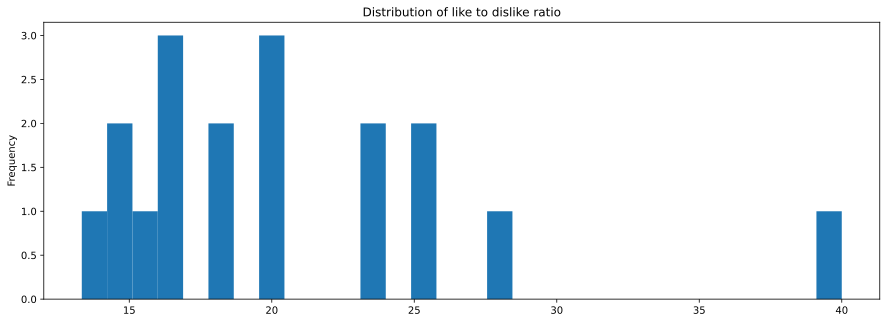

In [91]:
books['L/D Ratio'].plot(kind='hist', bins=30, title='Distribution of like to dislike ratio', figsize=(15, 5))

<AxesSubplot:title={'center':'Views vs Likes'}, xlabel='Views', ylabel='Likes'>

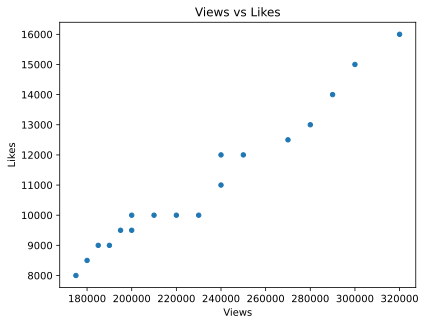

In [95]:
books.plot(kind='scatter', x='Views', y='Likes', title='Views vs Likes')

# Save our output

In [96]:
df.to_csv('processed_data_books.csv')